<a href="https://colab.research.google.com/github/ktripa/CPSC-8430-HW1/blob/main/Q3_Randomshuffling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Can Network Fit Random Labels?**

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import seaborn as sns
import os
import matplotlib.pyplot as plt
from google.colab import files

Here we have considered MNIST Data for the problem. 

In [ ]:
mnist=keras.datasets.mnist
(train_images,train_labels), (test_images,test_labels) = mnist.load_data()
print('original labels in the trainding labels are\n',train_labels)

11493376/11490434 [==============================] - 0s 0us/step
original labels in the trainding labels are
 [5 0 4 ... 5 6 8]


**Randomly Shuffle the training labels**

In [ ]:
np.random.shuffle(train_labels)
suffled_train_labels= train_labels
print('After randomly shuffling the data, the shuffled training labels are\n',suffled_train_labels)

After randomly shuffling the data, the shuffled training labels are
 [4 2 4 ... 0 8 8]


Normalize the MNIST Data i.e. normalizing each pixel values between 0 and 1 for our convinience.

In [ ]:
train_images= tf.keras.utils.normalize(train_images,axis=1)
test_images= tf.keras.utils.normalize(test_images,axis=1)

In [ ]:
model_DNN=keras.models.Sequential(
    [keras.layers.Flatten(),
     keras.layers.Dense(128,activation=tf.nn.relu),
     keras.layers.Dense(128,activation=tf.nn.relu),
     keras.layers.Dense(10,activation=tf.nn.softmax),
    ]
)
model_DNN.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
history_DNN= model_DNN.fit(train_images, suffled_train_labels, validation_split=0.1, epochs=500)


Epoch 1/500
1688/1688 [==============================] - 5s 3ms/step - loss: 2.3055 - accuracy: 0.1080 - val_loss: 2.3011 - val_accuracy: 0.1150
Epoch 2/500
1688/1688 [==============================] - 4s 2ms/step - loss: 2.3010 - accuracy: 0.1117 - val_loss: 2.3047 - val_accuracy: 0.1073
Epoch 3/500
1688/1688 [==============================] - 4s 3ms/step - loss: 2.2998 - accuracy: 0.1151 - val_loss: 2.3072 - val_accuracy: 0.1035
Epoch 4/500
1688/1688 [==============================] - 4s 3ms/step - loss: 2.2973 - accuracy: 0.1182 - val_loss: 2.3116 - val_accuracy: 0.1052
Epoch 5/500
1688/1688 [==============================] - 4s 3ms/step - loss: 2.2914 - accuracy: 0.1234 - val_loss: 2.3119 - val_accuracy: 0.1032
Epoch 6/500
1688/1688 [==============================] - 4s 3ms/step - loss: 2.2823 - accuracy: 0.1330 - val_loss: 2.3179 - val_accuracy: 0.1027
Epoch 7/500
1688/1688 [==============================] - 4s 2ms/step - loss: 2.2694 - accuracy: 0.1410 - val_loss: 2.3286 - val_ac

Text(0.5, 1.0, 'Model Loss')

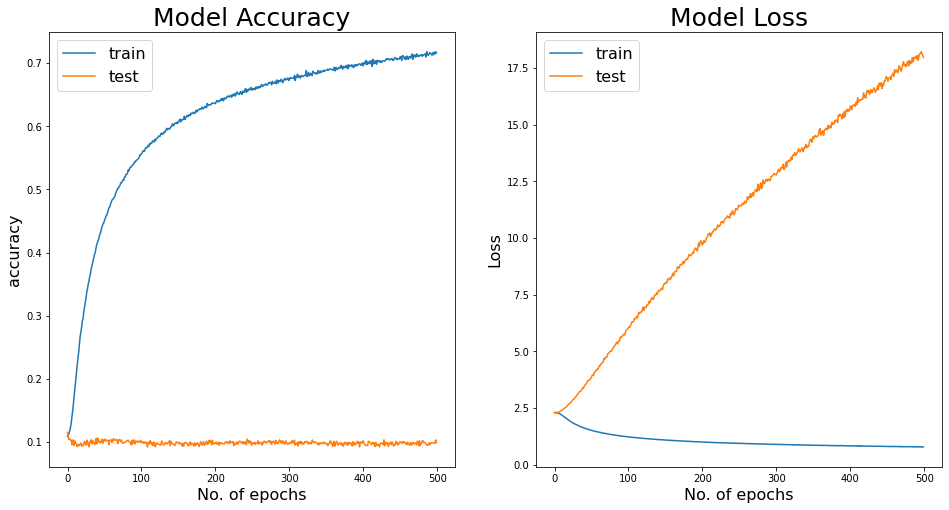

In [ ]:
fig = plt.figure(figsize=(16,8))
# two subplots
#accuracy
ax1 = fig.add_subplot(1,2,1)
ax1.plot(history_DNN.history['accuracy'], label='train')
ax1.plot(history_DNN.history['val_accuracy'], label='test')
ax1.legend(loc='upper left',fontsize=16)
ax1.set_xlabel('No. of epochs',fontsize=16)
ax1.set_ylabel("accuracy",fontsize=16)
ax1.set_title('Model Accuracy',fontsize=25)
#loss
ax2 = fig.add_subplot(1,2,2)
ax2.plot(history_DNN.history['loss'], label='train')
ax2.plot(history_DNN.history['val_loss'], label='test')
ax2.legend(loc='upper left',fontsize=16)
ax2.set_xlabel('No. of epochs',fontsize=16)
ax2.set_ylabel("Loss",fontsize=16)
ax2.set_title('Model Loss',fontsize=25)

In [ ]:
# model evaluation accuracy
model_DNN.evaluate(test_images,test_labels)

313/313 [==============================] - 0s 1ms/step - loss: 17.9364 - accuracy: 0.1000


[17.936424255371094, 0.10000000149011612]